In [1]:
import pandas as pd

column_names = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content']
training_path = "D:\\Internship\\PRODIGY\\Task4\\twitter_training.csv"
validation_path = "D:\\Internship\\PRODIGY\\Task4\\twitter_validation.csv"

df_train = pd.read_csv(training_path, names=column_names)
df_validation = pd.read_csv(validation_path, names=column_names)

print("Training Data Shape:", df_train.shape)
print("Validation Data Shape:", df_validation.shape)

Training Data Shape: (74682, 4)
Validation Data Shape: (1000, 4)


In [2]:
print("FIRST FEW ROWS OF THE TRAINING DATA:")
df_train.head()

FIRST FEW ROWS OF THE TRAINING DATA:


,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
print("MISSING VALUES IN EACH COLUMN (TRAINING DATA):")
print(df_train.isnull().sum())

MISSING VALUES IN EACH COLUMN (TRAINING DATA):
Tweet ID           0
Entity             0
Sentiment          0
Tweet Content    686
dtype: int64


In [4]:
print("DISTRIBUTION OF SENTIMENT LABELS:")
print(df_train['Sentiment'].value_counts())

DISTRIBUTION OF SENTIMENT LABELS:
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [5]:
print("Shape BEFORE removing missing values:", df_train.shape)

df_train_clean = df_train.dropna(subset=['Tweet Content'])

print("Shape AFTER removing missing values:", df_train_clean.shape)

print("Missing values in 'Tweet Content' after cleaning:", df_train_clean['Tweet Content'].isnull().sum())

Shape BEFORE removing missing values: (74682, 4)
Shape AFTER removing missing values: (73996, 4)
Missing values in 'Tweet Content' after cleaning: 0


In [6]:
print("Number of duplicate tweets:", df_train_clean.duplicated(subset=['Tweet Content']).sum())

df_train_clean = df_train_clean.drop_duplicates(subset=['Tweet Content'])

print("Shape AFTER removing duplicates:", df_train_clean.shape)

Number of duplicate tweets: 4505
Shape AFTER removing duplicates: (69491, 4)


In [7]:
print("Current Sentiment Counts:")
print(df_train_clean['Sentiment'].value_counts())
print("\n")

df_train_clean = df_train_clean[df_train_clean['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

print("Sentiment Counts AFTER filtering 'Irrelevant':")
print(df_train_clean['Sentiment'].value_counts())
print("Final Shape of Cleaned Data:", df_train_clean.shape)

Current Sentiment Counts:
Sentiment
Negative      21166
Positive      19067
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


Sentiment Counts AFTER filtering 'Irrelevant':
Sentiment
Negative    21166
Positive    19067
Neutral     17042
Name: count, dtype: int64
Final Shape of Cleaned Data: (57275, 4)


In [8]:
from textblob import TextBlob

def get_sentiment_score(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None

df_train_clean['Polarity'] = df_train_clean['Tweet Content'].apply(get_sentiment_score)

print("DATA WITH POLARITY SCORES:")
df_train_clean[['Tweet Content', 'Sentiment', 'Polarity']].head(10)

DATA WITH POLARITY SCORES:


,Tweet Content,Sentiment,Polarity
0,im getting on borderlands and i will murder yo...,Positive,0.000000
1,I am coming to the borders and I will kill you...,Positive,0.000000
2,im getting on borderlands and i will kill you ...,Positive,0.000000
3,im coming on borderlands and i will murder you...,Positive,0.000000
4,im getting on borderlands 2 and i will murder ...,Positive,0.000000
5,im getting into borderlands and i can murder y...,Positive,0.000000
6,So I spent a few hours making something for fu...,Positive,0.284375
7,So I spent a couple of hours doing something f...,Positive,0.335714
8,So I spent a few hours doing something for fun...,Positive,0.180000
9,So I spent a few hours making something for fu...,Positive,0.284375


In [9]:
average_polarity = df_train_clean.groupby('Sentiment')['Polarity'].mean()
print("AVERAGE POLARITY BY SENTIMENT LABEL:")
print(average_polarity)

AVERAGE POLARITY BY SENTIMENT LABEL:
Sentiment
Negative   -0.090185
Neutral     0.096683
Positive    0.225616
Name: Polarity, dtype: float64


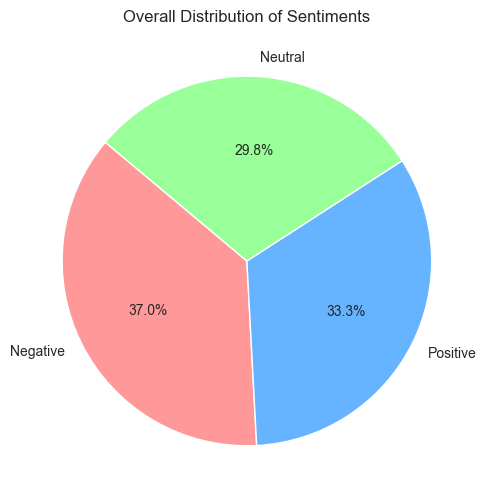

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sentiment_counts = df_train_clean['Sentiment'].value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Overall Distribution of Sentiments')
plt.show()

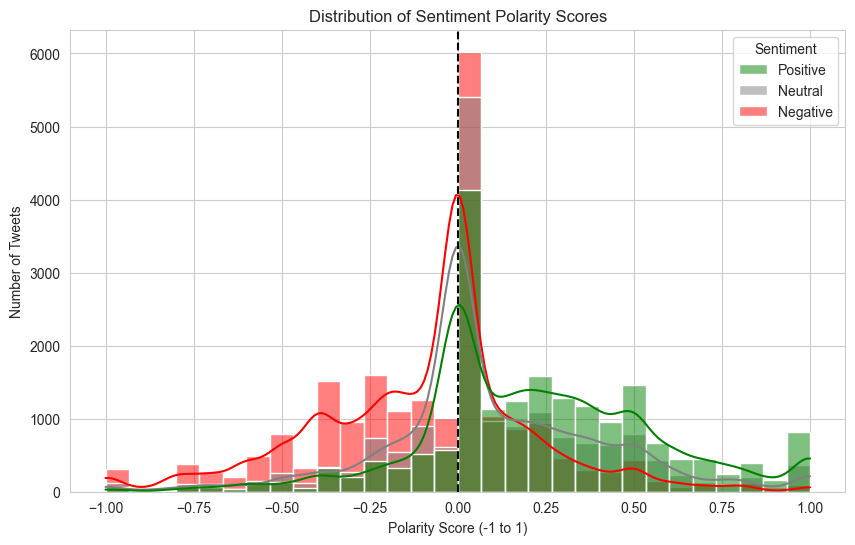

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train_clean, x='Polarity', bins=30, kde=True, hue='Sentiment', palette={'Negative':'red', 'Neutral':'grey', 'Positive':'green'})
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity Score (-1 to 1)')
plt.ylabel('Number of Tweets')
plt.axvline(0, color='black', linestyle='--')
plt.show()

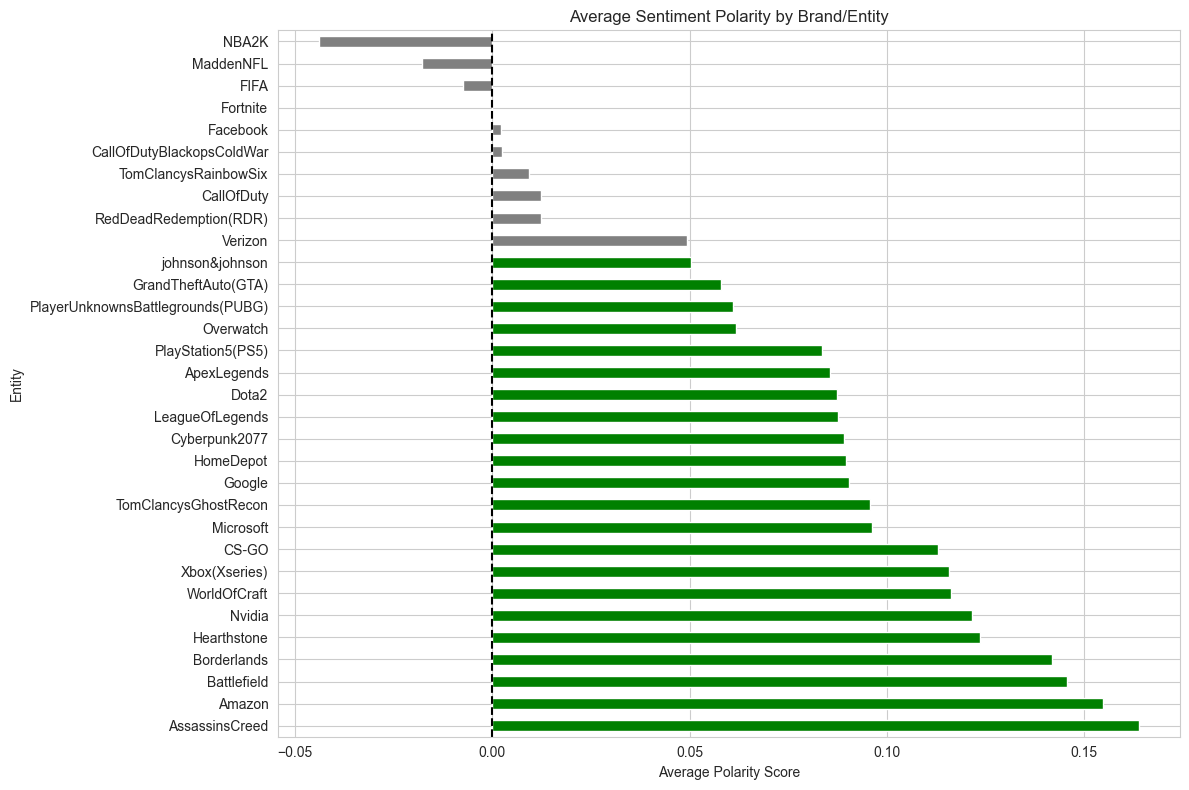

In [12]:
entity_polarity = df_train_clean.groupby('Entity')['Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
entity_polarity.plot(kind='barh', color=entity_polarity.map(lambda x: 'green' if x > 0.05 else 'red' if x < -0.05 else 'grey'))
plt.title('Average Sentiment Polarity by Brand/Entity')
plt.xlabel('Average Polarity Score')
plt.ylabel('Entity')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\ANANNYA
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


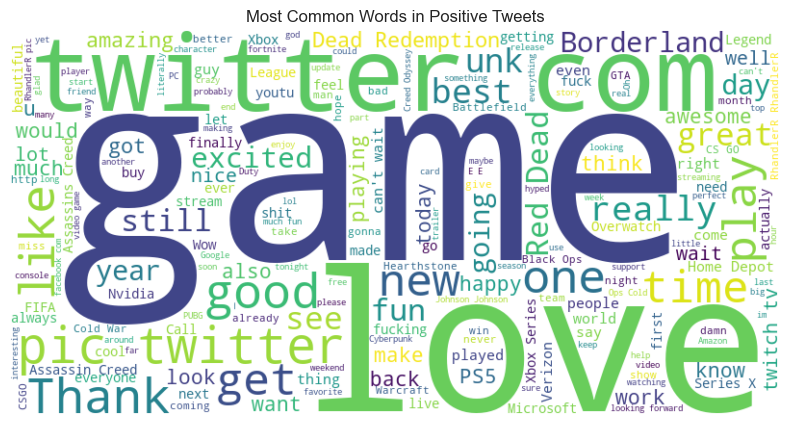

In [14]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def generate_wordcloud(sentiment):
    text = ' '.join(tweet for tweet in df_train_clean[df_train_clean['Sentiment'] == sentiment]['Tweet Content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Common Words in {sentiment} Tweets')
    plt.axis('off')
    plt.show()

generate_wordcloud('Positive')

C:\Users\ANANNYA DUTTA\AppData\Local\Temp\ipykernel_10964\3269552797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_entities, y='Entity', x='Polarity', palette='viridis')


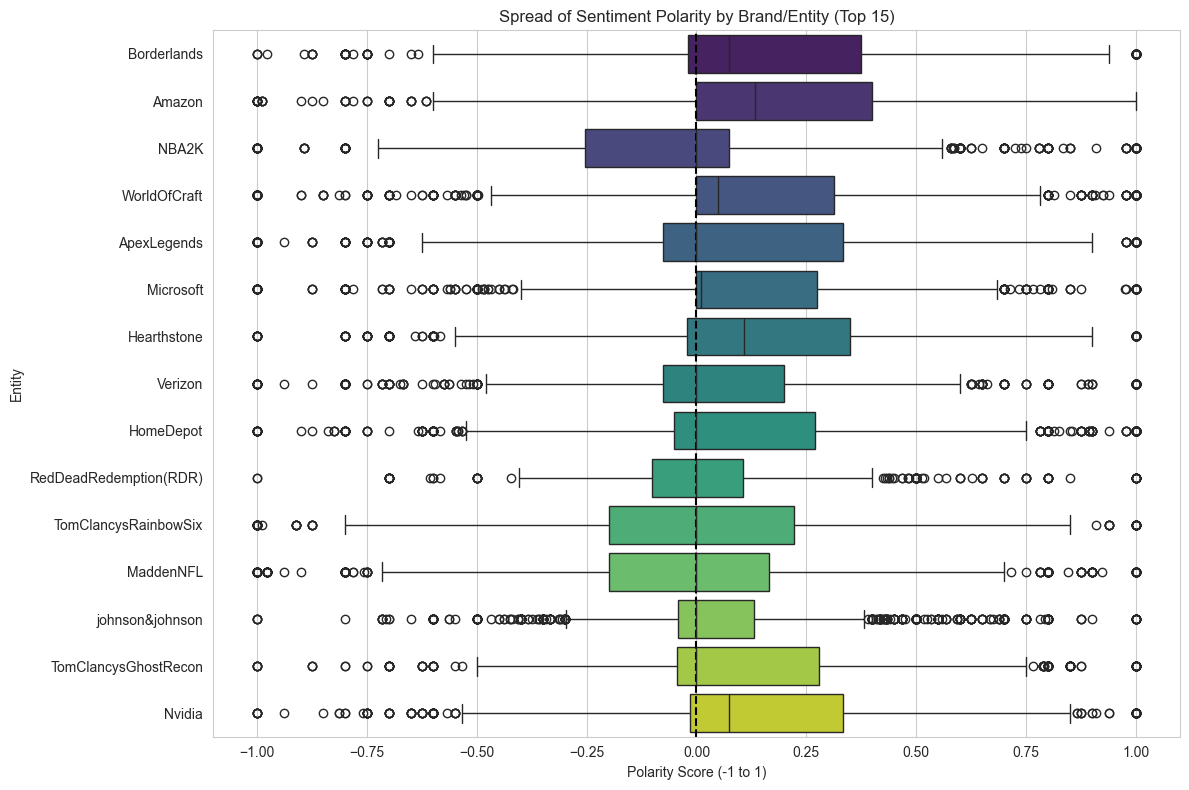

In [15]:
plt.figure(figsize=(12, 8))

top_entities = df_train_clean['Entity'].value_counts().head(15).index
df_top_entities = df_train_clean[df_train_clean['Entity'].isin(top_entities)]

sns.boxplot(data=df_top_entities, y='Entity', x='Polarity', palette='viridis')
plt.title('Spread of Sentiment Polarity by Brand/Entity (Top 15)')
plt.xlabel('Polarity Score (-1 to 1)')
plt.ylabel('Entity')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()